
ARCHISHA SRIVASTAVA







---



# AIM:
Finding if there is a relation between INCOME and LIFE SATISFACTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/LAB_3.csv')#importing csv file as dataframe and reading it
df.head(10)

,Income,Life Satisfaction
0,427064,7.3
1,308325,7.1
2,386006,6.9
3,423849,7.4
4,100967,6.5
5,..,6.3
6,..,6.7
7,118637,7.6
8,159373,5.7
9,200827,7.6


In [ ]:
df.axes#checking the structure 
#41 rows and 2 columns
#Index is of datatype object

[RangeIndex(start=0, stop=41, step=1),
 Index(['Income', 'Life Satisfaction'], dtype='object')]

In [ ]:
df.dtypes
#checking datatype

Income                object
Life Satisfaction    float64
dtype: object

We can notice that Income values are present as an object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             41 non-null     object 
 1   Life Satisfaction  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 784.0+ bytes


Since there are only 41 rows checking string , null or nan values mannually in the data

In [ ]:
df['Income']

0     427064
1     308325
2     386006
3     423849
4     100967
5         ..
6         ..
7     118637
8     159373
9     200827
10    280653
11    259667
12    150134
13    104458
14        ..
15    217130
16        ..
17    279889
18    305878
19    285980
20     70160
21        ..
22    769053
23        ..
24    157824
25    388514
26    228936
27    210991
28    232666
29    119696
30    203044
31    373548
32        ..
33        ..
34        ..
35    548392
36    632100
37    408376
38        ..
39        ..
40        ..
Name: Income, dtype: object

Replacing string values present in income column by mean 0 

In [ ]:
df["Income"]= df["Income"].replace("..", float(0))

In [ ]:
#Displaying data after conversion
df["Income"].head(7)

0    427064
1    308325
2    386006
3    423849
4    100967
5       0.0
6       0.0
Name: Income, dtype: object

We can still see that the datatype of Income is object

So we will convert the datatype of income from object to float to calculate mean 

In [ ]:
df["Income"]=df["Income"].astype("float")#converting datatype of income

Calculating mean income

In [ ]:
#Mean of Income where Income is not equal to 0.0
avgIncome=df[df["Income"] != 0.0].mean()

In [ ]:
print(avgIncome)

Income               288004.724138
Life Satisfaction         6.572414
dtype: float64


In [ ]:
avgIncome[0]#mean income

288004.724137931

Replacing the 0 values with mean income to get more accurate results

In [ ]:
df["Income"]= df["Income"].replace(0.0, avgIncome[0])
df.head(10)

,Income,Life Satisfaction
0,427064.000000,7.3
1,308325.000000,7.1
2,386006.000000,6.9
3,423849.000000,7.4
4,100967.000000,6.5
5,288004.724138,6.3
6,288004.724138,6.7
7,118637.000000,7.6
8,159373.000000,5.7
9,200827.000000,7.6


Renaming the columns 

In [ ]:
df = df.rename({'Income': 'X', 'Life Satisfaction': 'Y'}, axis=1)

In [ ]:
df.columns

Index(['X', 'Y'], dtype='object')

In [ ]:
x=df[['X']]#independent variale
y=df[['Y']]#dependent variable

In [ ]:
#Developing a linear regression model.
#Naming this model as "model"
model= LinearRegression()
 #Fitting the model to our data
model.fit(x,y)

LinearRegression()

In [ ]:
#Obtain the r_sqr value
print("r_squared : ", model.score(x,y))

r_squared :  0.057582775796690466


In [ ]:
#Obtain the intercept and the coefficient
b0= model.intercept_
b1= model.coef_
print("b0=",b0,"\n","b1=",b1)
#(y_i ) ̂=b_0+b_1 x 
print(" Regression line is y_est= {} + {}*x".format(b0,b1))

b0= [6.16085137] 
 b1= [[1.29614185e-06]]
 Regression line is y_est= [6.16085137] + [[1.29614185e-06]]*x


In [ ]:
#Estimated value of y using the regression model
yest= model.predict(x)

In [ ]:
df.head(5)

,X,Y
0,427064.0,7.3
1,308325.0,7.1
2,386006.0,6.9
3,423849.0,7.4
4,100967.0,6.5


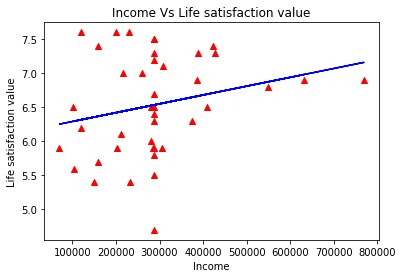

In [ ]:
plt.title("Income Vs Life satisfaction value")
plt.xlabel("Income")
plt.ylabel("Life satisfaction value")
plt.scatter(df.X, df.Y, color="red",marker='^')
plt.plot(df.X, yest, color='blue')
plt.show()#does not show the data type along with scatterplot

Using Statsmodels module

In [ ]:
x= sm.add_constant(x) #This is the intercept that has to be added to create the model

In [ ]:
model= sm.OLS(y, x) # create the model
results = model.fit() #fit the model

In [ ]:
print(results.summary())#Obtain the results of regression

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.383
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.131
Time:                        09:31:52   Log-Likelihood:                -44.266
No. Observations:                  41   AIC:                             92.53
Df Residuals:                      39   BIC:                             95.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1609      0.267     23.042      0.0

Understanding OLS Regression Results


*   R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.338 would mean our model explains 33.8% of the change in 'Dependent variable-Life Satisfaction’

*  AIC and BIC are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.




# What is OLS?
Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). M

In [ ]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  const    6.160851
X        0.000001
dtype: float64
R2:  0.057582775796690355


In [ ]:
results.ssr #Method to obtain SSR

20.801216858903093

In [ ]:
#calculate sse
sse = np.sum((results.fittedvalues - df.Y)**2)
print("SSE =", sse)
#calculate ssr
ssr = np.sum((results.fittedvalues - df.Y.mean())**2)
print("SSR = ", ssr)
#calculate sst
sst = ssr + sse
print("SST = ", sst)

SSE = 20.801216858903096
SSR =  1.2709782630481168
SST =  22.072195121951214


In [ ]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(df.Y,yest)
print(MSE)

0.5073467526561729


n=1 for linear regression

Manually calculating F value

In [ ]:
#MSR=SSR/1
MSR=ssr
F=MSR/MSE
print("Fcal=",F)

Fcal= 2.505147133383653




---



In [ ]:
#finding Fcritical value
import scipy.stats
#•	Numerator degree of freedom is k, where k is number of independent variables
#•	Denominator degree of freedom is n-k-1
n=len(df. X) 
k=1
scipy.stats.f.ppf(q=1-.05, dfn=k, dfd=n-k-1)
#where:
#q: The significance level to use
#dfn: The numerator degrees of freedom
#dfd: The denominator degrees of freedom'''


4.091278557999154

In [ ]:
#F-statistic=2.383
#from OLS model result

b.	Construct the ANOVA table

In [ ]:
from statsmodels.formula.api import ols

Ordinary Least Squares (OLS)

In [ ]:
model=ols("df.X ~ df.Y",data=df).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
df.Y,1.0,4.356379e+10,4.356379e+10,2.382945,0.130743
Residual,39.0,7.129782e+11,1.828149e+10,NaN,NaN


p-value (listed as Prob F-statistic)=0.131

---

If the F-statistic > F-critical or
if the Prob (F-statistic) is approximately 0 then we reject the null hypothesis

Observation from ANOVA table

*   F is the F-statistic value
*   PR is the p-value




Theory

*   If the p-value is below 0.05, we reject the null hypothesis 




**OBSERVATION**

	Comment on the following on the basis of t statistic and f statistic
	


“Is there sufficient evidence to indicate that life satisfaction if linearly related to the amount of household net income?” Use α=0.5




---
---
Interpreting p-value:
 
*   We have to compare the p-value to our chosen alpha, in this case, 0.05.
Our p-value of 0.130743 is larger than 0.05, so we cannot reject our null hypothesis 


*  F-statistic < F-critical ,hence we accept null hypothesis and we can say that there is  sufficient evidence to indicate that life satisfaction if linearly related to the amount of household net income







**CONCLUSION**

---


Life  Satisfaction value is linearly related to Income